# Did you perceive the Tinnitus right now?
### Crosstab by season and country


In [1]:
# project location
p_loc = 'C:/Users/joa24jm/Documents/tinnitus-country/'

# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\joa24jm\\Documents\\tinnitus-country\\src\\')

In [129]:
# imports
import pandas as pd
from d00_utils import utilities as u
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, ks_2samp

In [3]:
# read in df
df = pd.read_csv(p_loc + '/data/02_intermediate/merged_users.csv', index_col = 'Unnamed: 0',
                parse_dates = ['4', '9', 'fup_answer_from', 'bl_answer_from'],na_values = ['??.??.????', '27.02.2522']
                )

In [4]:
# number of countries
df.country.unique().shape

(111,)

In [5]:
# improve readability
df.rename(columns = {'question1':'Tinnitus_right_now'}, inplace = True)
df.Tinnitus_right_now.replace({0.0: 'No', 1.0: 'Yes'}, inplace = True)

In [6]:
df['fup_season'] = df.fup_answer_from.dt.date.apply(u.get_season)

C:\Users\joa24jm\Documents\tinnitus-country\src\d00_utils\utilities.py:177: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  if start <= d <= end)


In [7]:
# get all countries with more than 30 users
u_treshold = 30

s = df.groupby('Country_Name').nunique()['user_id'] > u_treshold
u_countries = s[s].index.tolist()

# from these countries, get all with more than 300 answers
s = df[df.Country_Name.isin(u_countries)].groupby('Country_Name').size() > 300
countries = s[s].index.tolist()
countries

['Australia, Commonwealth of',
 'Austria, Republic of',
 'Belgium, Kingdom of',
 'Brazil, Federative Republic of',
 'Canada',
 'France, French Republic',
 'Germany, Federal Republic of',
 'Italy, Italian Republic',
 'Netherlands, Kingdom of the',
 'Norway, Kingdom of',
 'Spain, Kingdom of',
 'Sweden, Kingdom of',
 'Switzerland, Swiss Confederation',
 'United Kingdom of Great Britain & Northern Ireland',
 'United States of America']

## Check distribution for Norway

In [8]:
# check for norway users as they have 50% tinnitus  and 50% tinnitus NO
norway_filt = df['Country_Name'] == 'Norway, Kingdom of'

In [9]:
# how many users from Norway?
df[norway_filt].user_id.unique().shape

(42,)

In [10]:
for season in ['spring', 'summer', 'autumn', 'winter']:
    season_filt = df['fup_season'] == season
    print('Season\t\t', season)
    print('No. of users\t', df[season_filt & norway_filt].user_id.unique().shape[0])

Season		 spring
No. of users	 6
Season		 summer
No. of users	 11
Season		 autumn
No. of users	 16
Season		 winter
No. of users	 7


####  Norway has about 50% Tinnitus YES and 50 % Tinnitus NO reportings. How do the reportings vary over seasons?

In [11]:
pd.crosstab(df[df.Country_Name == 'Norway, Kingdom of'].fup_season, df.Tinnitus_right_now, normalize = 'index')


Tinnitus_right_now,No,Yes
fup_season,,
autumn,0.587361,0.412639
spring,0.417178,0.582822
summer,0.360577,0.639423
winter,0.702875,0.297125


## Check distributions for other countries in Europe

In [12]:
# sort tinnitus answers by country and season
ct = pd.crosstab([df[df.Country_Name.isin(countries)].Country_Name, df[df.Country_Name.isin(countries)].fup_season], df.Tinnitus_right_now,
                normalize='index')

In [13]:
# reindex in a logical order
ct = ct.reindex(['spring', 'summer', 'autumn', 'winter'], level = 'fup_season')

In [14]:
# find out the n_users and n_questionnaires for each country and season
ct['n_users'] = None
ct['n_questionnaires'] = None

for multi_index in ct.index:
    c = multi_index[0] # country
    s = multi_index[1] # season
    n_users = df[(df.Country_Name == c) & (df.fup_season == s)].nunique().user_id
    n_questionnaires = df[(df.Country_Name == c) & (df.fup_season == s)].shape[0]
    
    ct.loc[multi_index, 'n_users'] = n_users
    ct.loc[multi_index, 'n_questionnaires'] = n_questionnaires

# keep only countries that are above the thresholds for all seasons
ct = ct.loc[(ct.n_users > 30) & (ct.n_questionnaires > 300)]
s = ct.groupby('Country_Name').size() == 4
ct = ct.loc[s[s].index, :]
ct.to_csv(p_loc + 'results/01_tables/tinnitus_by_season.csv')
ct

Tinnitus_right_now                                                   No  \
Country_Name                                       fup_season             
Germany, Federal Republic of                       spring      0.223920   
                                                   summer      0.219304   
                                                   autumn      0.169706   
                                                   winter      0.235056   
Netherlands, Kingdom of the                        spring      0.352028   
                                                   summer      0.101167   
                                                   autumn      0.370302   
                                                   winter      0.374474   
Switzerland, Swiss Confederation                   spring      0.312107   
                                                   summer      0.250427   
                                                   autumn      0.348889   
                                                   winter      0.392694   
United Kingdom of Great Britain & Northern Ireland spring      0.156069   
                                                   summer      0.042770   
                                                   autumn      0.278978   
                                                   winter      0.341102   
United States of America                           spring      0.122672   
                                                   summer      0.188973   
                                                   autumn      0.100504   
                                                   winter      0.108846   

Tinnitus_right_now                                                  Yes  \
Country_Name                                       fup_season             
Germany, Federal Republic of                       spring      0.776080   
                                                   summer      0.780696   
                                                   autumn      0.830294   
                                                   winter      0.764944   
Netherlands, Kingdom of the                        spring      0.647972   
                                                   summer      0.898833   
                                                   autumn      0.629698   
                                                   winter      0.625526   
Switzerland, Swiss Confederation                   spring      0.687893   
                                                   summer      0.749573   
                                                   autumn      0.651111   
                                                   winter      0.607306   
United Kingdom of Great Britain & Northern Ireland spring      0.843931   
                                                   summer      0.957230   
                                                   autumn      0.721022   
                                                   winter      0.658898   
United States of America                           spring      0.877328   
                                                   summer      0.811027   
                                                   autumn      0.899496   
                                                   winter      0.891154   

Tinnitus_right_now                                            n_users  \
Country_Name                                       fup_season           
Germany, Federal Republic of                       spring         385   
                                                   summer         378   
                                                   autumn         460   
                                                   winter         387   
Netherlands, Kingdom of the                        spring          48   
                                                   summer          44   
                                                   autumn          78   
                                         

In [15]:
pd.crosstab(df.fup_season, df.Tinnitus_right_now, normalize = 'index')

Tinnitus_right_now,No,Yes
fup_season,,
autumn,0.198492,0.801508
spring,0.214979,0.785021
summer,0.197533,0.802467
winter,0.245255,0.754745


In [16]:
ct.groupby('fup_season').describe()['Yes']

,count,mean,std,min,25%,50%,75%,max
fup_season,,,,,,,,
spring,5.0,0.766641,0.098232,0.647972,0.687893,0.776080,0.843931,0.877328
summer,5.0,0.839472,0.086221,0.749573,0.780696,0.811027,0.898833,0.957230
autumn,5.0,0.746324,0.115996,0.629698,0.651111,0.721022,0.830294,0.899496
winter,5.0,0.709566,0.118457,0.607306,0.625526,0.658898,0.764944,0.891154


#### Plot Tinnitus YES NO distribution by country and season

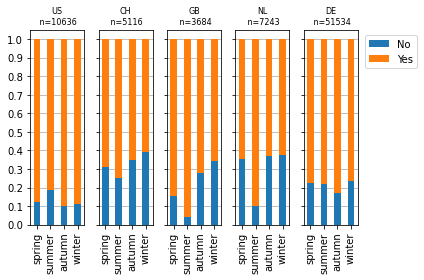

In [17]:
# generate the plot
fig, axes = plt.subplots(nrows = 1, ncols = int(ct.shape[0]/4), sharey=True)

countries = list(set([i[0] for i in ct.index]))
labels = ['spring', 'summer', 'autmn', 'winter']
country_labels = ['CH', 'DE', 'US', 'GB', 'NL']

for country2, ax, t in zip(countries, axes, country_labels):
    

    
    ct.loc[country2][['No', 'Yes']].plot.bar(stacked = True, ax = ax, zorder=3)
    
    # remove legend in each axis
    ax.get_legend().remove()
    
    # ax.set_xticklabels(labels = labels, rotation=90, fontsize=10)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks(np.arange(0,1.1,.1))
    
    # set log scale and labels
    country_code = df[df.Country_Name.isin([country2])].country.unique().tolist()[0]
    n = '\n n=' + str(ct.loc[country2].n_questionnaires.sum())
    title = country_code + n
    
    ax.set_title(title, fontsize=8)
    
    # grid for better readability
    ax.grid(axis='y', zorder=0)
    
    
    # show values on bars
    # u.show_values_on_bars(ax, h_v = 'v', space = 1, normalize = True)
    
   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.savefig(p_loc + 'results/07_plots/tinnitus_by_season.svg')





### Statistics

In [18]:
ct.describe()

Tinnitus_right_now,No,Yes
count,20.000000,20.000000
mean,0.234499,0.765501
std,0.108368,0.108368
min,0.042770,0.607306
25%,0.147720,0.656952
50%,0.229488,0.770512
75%,0.343048,0.852280
max,0.392694,0.957230


## Plot distribution by continent

In [19]:
ct = pd.crosstab([df.Continent_Name, df.fup_season], df.Tinnitus_right_now, normalize = 'index')
# reindex in a logical order
ct = ct.reindex(['spring', 'summer', 'autumn', 'winter'], level = 'fup_season')

In [20]:
# Number of answers per continent and season
ns = pd.crosstab(df.Continent_Name, df.Tinnitus_right_now, normalize = False).sum(axis = 1)

In [21]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

Text(0.5, 1.05, 'Did you perceive the tinnitus right now?')

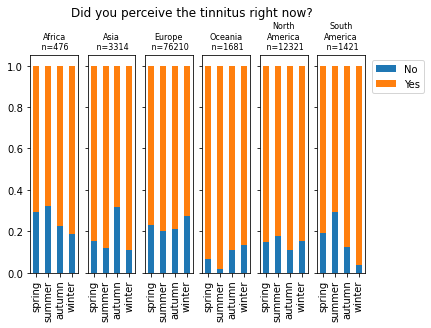

In [22]:
# generate the plot
fig, axes = plt.subplots(nrows = 1, ncols = len(continents), sharey=True)

labels = ['spring', 'summer', 'autmn', 'winter']

for continent, ax, t in zip(continents, axes, continents):
        
    ct.loc[continent][['No', 'Yes']].plot.bar(stacked = True, ax = ax)
    
    # remove legend in each axis
    ax.get_legend().remove()
    
    # ax.set_xticklabels(labels = labels, rotation=90, fontsize=10)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    names = '\n'.join(t.split(' '))
    n = '\n n=' + str(ns[continent])
    title = names + n
    
    # set log scale and labels
    ax.set_title(title, fontsize=8)
    
    # show values on bars
    # u.show_values_on_bars(ax, h_v = 'v', space = 1, normalize = True)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Did you perceive the tinnitus right now?', y = 1.05)

In [23]:
pd.crosstab(df.fup_season, df.Tinnitus_right_now)

Tinnitus_right_now,No,Yes
fup_season,,
autumn,5081,20517
spring,4805,17546
summer,4532,18411
winter,6022,18532


### Tinnitus perception for users with more than 365 filled out questionnaires

In [24]:
# get all users with more than 365 daily questionnaires
users_365 = df.user_id.value_counts()[df.user_id.value_counts() > 365].index.tolist()
users_b365 = df.user_id.value_counts()[df.user_id.value_counts() <= 365].index.tolist()



In [25]:
# get season column
df['season'] = df.fup_answer_from.apply(u.get_season)

C:\Users\joa24jm\Documents\tinnitus-country\src\d00_utils\utilities.py:177: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  if start <= d <= end)


In [26]:
# shrink dataframe to users_365
sub_df = df[df.user_id.isin(users_365)]

In [32]:
# Occurence of Tinnitus for users_365
df.Tinnitus_right_now.value_counts(normalize = True)

Yes    0.785847
No     0.214153
Name: Tinnitus_right_now, dtype: float64

In [33]:
# Occurence of tinnitus by season for users_365
pd.crosstab(sub_df.season, sub_df.Tinnitus_right_now, normalize = 'index').style.format('{:,.2%}')


Tinnitus_right_now,No,Yes
season,,
autumn,15.26%,84.74%
spring,18.46%,81.54%
summer,16.06%,83.94%
winter,18.98%,81.02%


## How does the tinnitus occurence vary over the months for users_365?

In [34]:
# get the month of each answer
idx = sub_df.fup_answer_from.dt.month.index
sub_df.loc[idx, 'month'] = sub_df.fup_answer_from.dt.month.values.tolist()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [36]:
# show results for users_365
ct1 = pd.crosstab(sub_df.month, sub_df.Tinnitus_right_now, normalize = 'index')
ct1.rename(columns={0.0:'No', 1.0:'Yes'}, inplace = True)
ct1.style.format('{:,.2%}')

Tinnitus_right_now,No,Yes
month,,
1,20.54%,79.46%
2,18.70%,81.30%
3,20.95%,79.05%
4,15.90%,84.10%
5,16.15%,83.85%
6,21.72%,78.28%
7,22.59%,77.41%
8,9.78%,90.22%
9,10.26%,89.74%


## How does the tinnitus occruence vary between the months for all users?

In [37]:
df['month'] = df.fup_answer_from.dt.month

In [38]:
sub_df2 = df[df.user_id.isin(users_b365)]

ct2 = pd.crosstab(sub_df2.month, sub_df2.Tinnitus_right_now, normalize = 'index')
ct2.rename(columns = {0.0:'No', 1.0:'Yes'}, inplace = True)
ct2 = ct2.reindex(labels = np.arange(1, 13,1))
ct2.style.format('{:,.2%}')

Tinnitus_right_now,No,Yes
month,,
1,28.10%,71.90%
2,29.84%,70.16%
3,27.34%,72.66%
4,28.08%,71.92%
5,20.54%,79.46%
6,20.18%,79.82%
7,23.72%,76.28%
8,22.54%,77.46%
9,20.76%,79.24%


In [39]:
# overall mean as a baseline comparison
df.Tinnitus_right_now.value_counts(normalize = True)

Yes    0.785847
No     0.214153
Name: Tinnitus_right_now, dtype: float64

### Plot results side by side

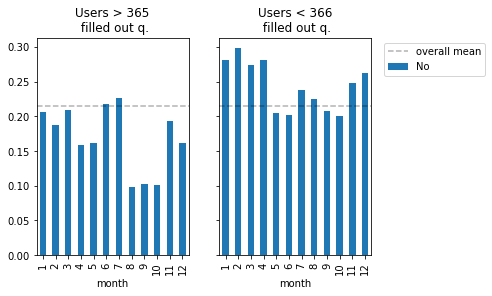

In [43]:
# instantiate plot element
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

# create subplots with stacked bars
ct1['No'].plot.bar(stacked=False, ax = ax1)
ct2['No'].plot.bar(stacked=False, ax = ax2)

# remove legends per axis
# ax1.get_legend().remove()
# ax2.get_legend().remove()

# set title
ax1.set_title('Users > 365\n filled out q.')
ax2.set_title('Users < 366\n filled out q.')

# place a line to indicate the mean
val = df.Tinnitus_right_now.value_counts(normalize = True)['No']
ax1.axhline(y=val, linestyle='dashed', alpha=0.3, color='black', zorder=1, label = 'overall mean')
ax2.axhline(y=val, linestyle='dashed', alpha=0.3, color='black', zorder=1, label = 'overall mean')

# 

# put legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# save fig

In [44]:
# report for users_365
ct1.describe()

Tinnitus_right_now,No,Yes
count,12.000000,12.000000
mean,0.168530,0.831470
std,0.046496,0.046496
min,0.097787,0.774056
25%,0.144870,0.793540
50%,0.174359,0.825641
75%,0.206460,0.855130
max,0.225944,0.902213


In [45]:
# report for all users 
ct2.describe()

Tinnitus_right_now,No,Yes
count,12.000000,12.000000
mean,0.243590,0.756410
std,0.035356,0.035356
min,0.201072,0.701556
25%,0.207049,0.724752
50%,0.242753,0.757247
75%,0.275248,0.792951
max,0.298444,0.798928


### Is there a correlation of temperature and tinnitus data?

In [46]:
# read in the temperature df
t = pd.read_csv(p_loc + '/data/02_intermediate/temp_by_country-code_by_month.csv')

In [47]:
# rename columns to merge with other df
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
t.rename(columns = dict(zip(months, list(np.arange(1,13,1)))), inplace = True)

In [55]:
# prepare df for analysis
d = df[['fup_answer_from', 'Tinnitus_right_now','country']]

d.Tinnitus_right_now.replace({'No':0,'Yes':1}, inplace = True)

d['month'] = None
d.loc[:,'month'] = d.fup_answer_from.dt.month


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [77]:
# calculate the mean per country and month
d.groupby(['country','month']).mean()

# select only countries with more than 30 users and more than 300 questionnaires
countries = ['DE', 'NL', 'US', 'GB', 'CH']


In [80]:
# calculate the mean (= chance for tinnitus right now) per country and month
res = d[d.country.isin(countries)].groupby(['country','month']).mean()


In [83]:
# write index to column
res['country'] = [t[0] for t in res.index]

In [89]:
# prepare t dataframe for merge
t = t.set_index('Code').drop(labels = 'Name', axis = 1)

In [96]:
t.loc[countries]

,1,2,3,4,5,6,7,8,9,10,11,12,Year
Code,,,,,,,,,,,,,
DE,1.100000,2.350000,5.750000,10.250000,14.750000,17.850000,20.150000,19.600000,15.250000,10.450000,5.800000,1.900000,10.450000
NL,3.400000,3.500000,6.100000,9.100000,12.900000,15.400000,17.600000,17.500000,14.700000,11.000000,7.100000,4.000000,10.200000
US,4.578846,6.505769,10.323077,14.780769,19.388462,23.584615,25.792308,25.271154,21.848077,16.176923,10.363462,5.540385,15.342308
GB,4.250000,4.500000,6.550000,8.400000,11.450000,14.300000,16.300000,16.100000,13.650000,10.350000,6.950000,4.450000,9.800000
CH,0.300000,1.300000,5.300000,8.800000,13.300000,16.400000,18.600000,18.000000,14.100000,9.900000,4.400000,1.400000,9.300000


In [99]:
# merge temperature with country and month and tinnitus occurence
res['temp'] = None
for month in np.arange(1,13,1):
    for cc in t.loc[countries].index:
        res.loc[(cc, month), 'temp'] = t.loc[cc, month]

In [100]:
res

Tinnitus_right_now country       temp
country month                                       
CH      1.0              0.642857      CH        0.3
        2.0              0.642857      CH        1.3
        3.0              0.532258      CH        5.3
        4.0              0.615012      CH        8.8
        5.0              0.748201      CH       13.3
        6.0              0.779468      CH       16.4
        7.0              0.737013      CH       18.6
        8.0              0.712846      CH       18.0
        9.0              0.787062      CH       14.1
        10.0             0.684507      CH        9.9
        11.0             0.606911      CH        4.4
        12.0             0.660377      CH        1.4
DE      1.0              0.761525      DE        1.1
        2.0              0.731678      DE       2.35
        3.0              0.767672      DE       5.75
        4.0              0.760571      DE      10.25
        5.0              0.791527      DE      14.75
        6.0              0.778350      DE      17.85
        7.0              0.736199      DE      20.15
        8.0              0.801716      DE       19.6
        9.0              0.821909      DE      15.25
        10.0             0.829690      DE      10.45
        11.0             0.813694      DE        5.8
        12.0             0.870639      DE        1.9
GB      1.0              0.709480      GB       4.25
        2.0              0.692090      GB        4.5
        3.0              0.586885      GB       6.55
        4.0              0.721790      GB        8.4
        5.0              0.929530      GB      11.45
        6.0              0.906504      GB       14.3
        7.0              0.907563      GB       16.3
        8.0              0.989899      GB       16.1
        9.0              0.967532      GB      13.65
        10.0             0.969231      GB      10.35
        11.0             0.685714      GB       6.95
        12.0             0.515695      GB       4.45
NL      1.0              0.604631      NL        3.4
        2.0              0.616361      NL        3.5
        3.0              0.610370      NL        6.1
        4.0              0.664683      NL        9.1
        5.0              0.650735      NL       12.9
        6.0              0.678445      NL       15.4
        7.0              0.937956      NL       17.6
        8.0              0.950769      NL       17.5
        9.0              0.827214      NL       14.7
        10.0             0.740157      NL       11.0
        11.0             0.588235      NL        7.1
        12.0             0.632468      NL        4.0
US      1.0              0.891599      US   4.578846
        2.0              0.914554      US   6.505769
        3.0              0.843876      US  10.323077
        4.0              0.889279      US  14.780769
        5.0              0.895299      US  19.388462
        6.0              0.811388      US  23.584615
        7.0              0.755935      US  25.792308
        8.0              0.851107      US  25.271154
        9.0              0.931238      US  21.848077
        10.0             0.935629      US  16.176923
        11.0             0.915720      US  10.363462
        12.0             0.855368      US   5.540385

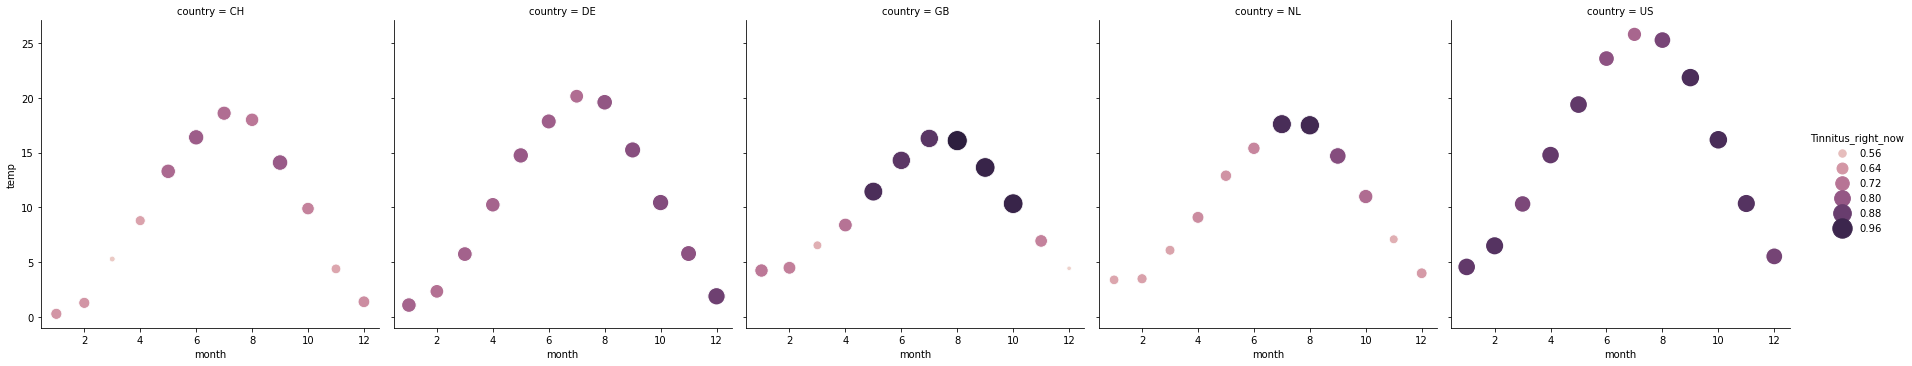

In [64]:
# convert temp to float
res.temp = res.temp.astype('float')


# plot results
sns.relplot(
    data=res, x="month", y="temp",
    col="country", size = 'Tinnitus_right_now', hue='Tinnitus_right_now',
    kind="scatter", sizes = (20,400)
)

plt.savefig(p_loc + 'results/07_plots/tinnitus_by_month_and_temp_and_country.svg')

In [107]:
# calculate correlations
for c in countries:
    x = res[res.country == c]['Tinnitus_right_now'].values
    y = res[res.country == c]['temp'].values
    print(c, '\t r:', '{:.2f}'.format(pearsonr(x,y)[0]), '\t p:', '{:.4f}'.format(pearsonr(x,y)[1]))


DE 	 r: -0.09 	 p: 0.7757
NL 	 r: 0.83 	 p: 0.0008
US 	 r: -0.41 	 p: 0.1809
GB 	 r: 0.86 	 p: 0.0004
CH 	 r: 0.72 	 p: 0.0087


### Does the tinnitus occurence vary throughout the year?

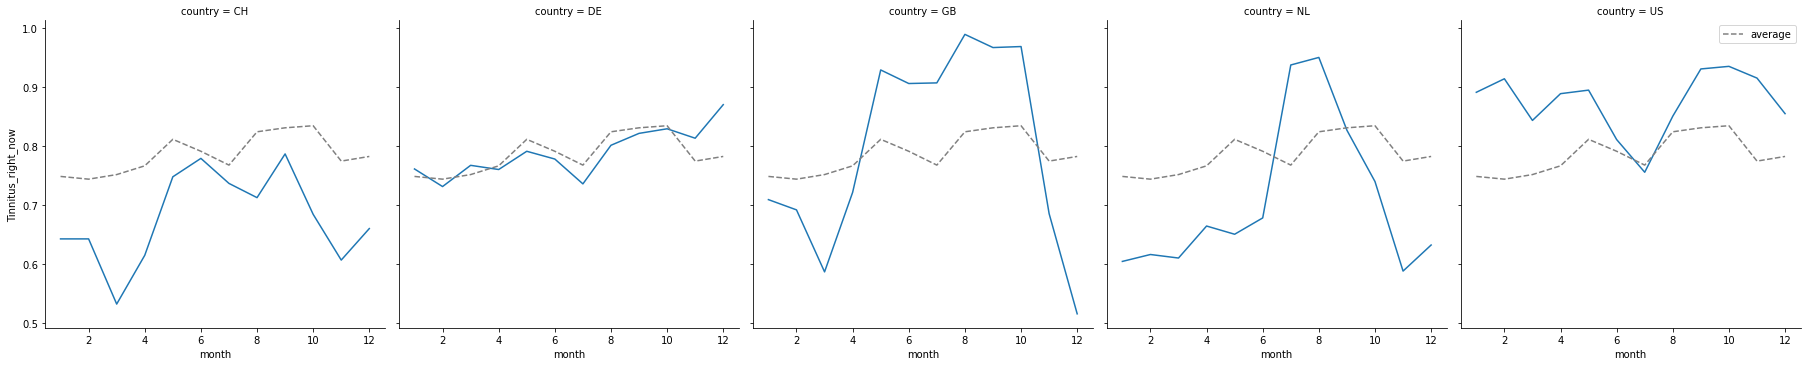

In [122]:
# plot results
g = sns.relplot(
    data=res, x="month", y="Tinnitus_right_now",
    col="country",
    kind="line", sizes = (20,400)
    )

# show the average for the whole df
y = pd.crosstab(df.month, df.Tinnitus_right_now, normalize = 'index')['Yes'].values
x_avg = pd.crosstab(df.month, df.Tinnitus_right_now, normalize = 'index')['Yes'].index
for country, ax in g.axes_dict.items():
    ax.plot(x_avg, y, linestyle = 'dashed', color = 'grey', label = 'average')

# add legend
plt.legend()

plt.savefig(p_loc + 'results/07_plots/tinnitus_by_month_and_country.svg')

In [139]:
# statistics for the curves above
res.groupby('country')['Tinnitus_right_now'].describe().style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
CH,12.00,0.68,0.08,0.53,0.64,0.67,0.74,0.79
DE,12.00,0.79,0.04,0.73,0.76,0.78,0.82,0.87
GB,12.00,0.80,0.16,0.52,0.69,0.81,0.94,0.99
NL,12.00,0.71,0.13,0.59,0.61,0.66,0.76,0.95
US,12.00,0.87,0.05,0.76,0.85,0.89,0.91,0.94


In [136]:
# are the curves significantly different from the averages?
avg = pd.crosstab(df.month, df.Tinnitus_right_now, normalize = 'index')['Yes'].values

for c in countries:
    pval = '{:.4f}'.format(ks_2samp(avg, res[res.country == c].Tinnitus_right_now.values)[1])
    statistic = '{:.2f}'.format(ks_2samp(avg, res[res.country == c].Tinnitus_right_now.values)[0])
    print(c, '\t', pval, '\t', statistic)

DE 	 0.9985 	 0.17
NL 	 0.0015 	 0.75
US 	 0.0002 	 0.83
GB 	 0.0995 	 0.50
CH 	 0.0015 	 0.75
